### Objective

A Book Recommendation System which recommends the users a selection of books based on their interests.
Ee will use the Collaborative based filtering method to build a book recommender system. 

Dataset Description

We have 3 files in our dataset which is extracted from some books selling websites.
​ Books – first are about books which contain all the information related to books like an author, title, publication year, etc.
​ Users – The second file contains registered user’s information like user id, location.
​ ratings – Ratings contain information like which user has given how much rating to which book.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics.pairwise import cosine_similarity
from pandas_profiling import ProfileReport

### Loading the data

In [2]:
book = pd.read_csv('D:\Project Ekeeda\BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [3]:
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
book.shape

(271360, 8)

In [5]:
book.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

In [6]:
book.describe()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [7]:
book.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [8]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
user = pd.read_csv('D:\Project Ekeeda\BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [10]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
user.columns = ['userID', 'Location', 'Age']

In [12]:
user.describe()

,userID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [13]:
user.shape

(278858, 3)

In [14]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
rating = pd.read_csv('D:\Project Ekeeda\BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")

In [16]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [17]:
rating.columns = ['userID', 'ISBN', 'bookRating']

In [18]:
rating.describe()

,userID,bookRating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [19]:
rating.shape

(1149780, 3)

In [20]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### NULL value in the dataframe

In [21]:
book.isnull().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

In [22]:
user.isnull().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [23]:
rating.isnull().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

#### Duplicates in the dataframe

In [24]:
book.duplicated().sum()

0

In [25]:
user.duplicated().sum()

0

In [26]:
rating.duplicated().sum()

0

In [27]:
book.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'], axis=1, inplace=True)
book.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [28]:
rating_with_name = rating.merge(book,on="ISBN")
print("Merging the 2 dataframes: ratings and books on ISBN")
display(rating_with_name)

Merging the 2 dataframes: ratings and books on ISBN


,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [29]:
dataset=rating_with_name.merge(user.drop("Age", axis=1), on="userID")
print("Merging the 2 dataframes: ratings_with_name and users on User-ID and dropping the age column:")
display(dataset)

Merging the 2 dataframes: ratings_with_name and users on User-ID and dropping the age column:


,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa"
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa"
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa"
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa"
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa"
...,...,...,...,...,...,...,...,...
1031131,276442,2862749796,7,Le Huit,Katherine Neville,2002,Le Cherche Midi,"genève, genève, switzerland"
1031132,276618,3788097000,5,Ludwig Marum: Briefe aus dem Konzentrationslag...,Ludwig Marum,1984,C.F. MÃ¼ller,"stuttgart, \n/a\""., germany"""
1031133,276647,0553571001,0,Christmas With Anne and Other Holiday Stories:...,L. M. Montgomery,2001,Starfire,"arlington heights, illinois, usa"
1031134,276647,0689822294,10,Heaven (Coretta Scott King Author Award Winner),Angela Johnson,1998,Simon &amp; Schuster Children's Publishing,"arlington heights, illinois, usa"


In [30]:
dataset.describe()

,userID,bookRating
count,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00
std,8.052466e+04,3.854157e+00
min,2.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00
50%,1.412100e+05,0.000000e+00
75%,2.114260e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


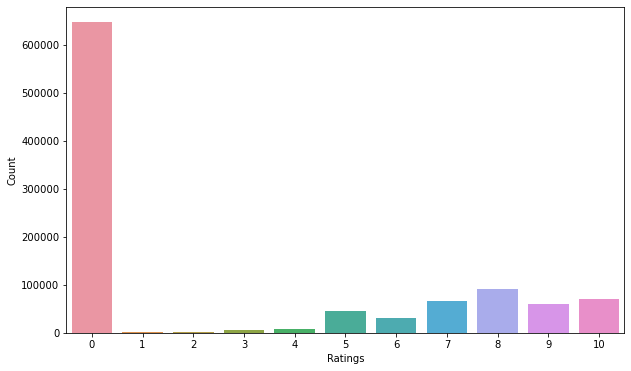

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data = dataset, x = 'bookRating')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

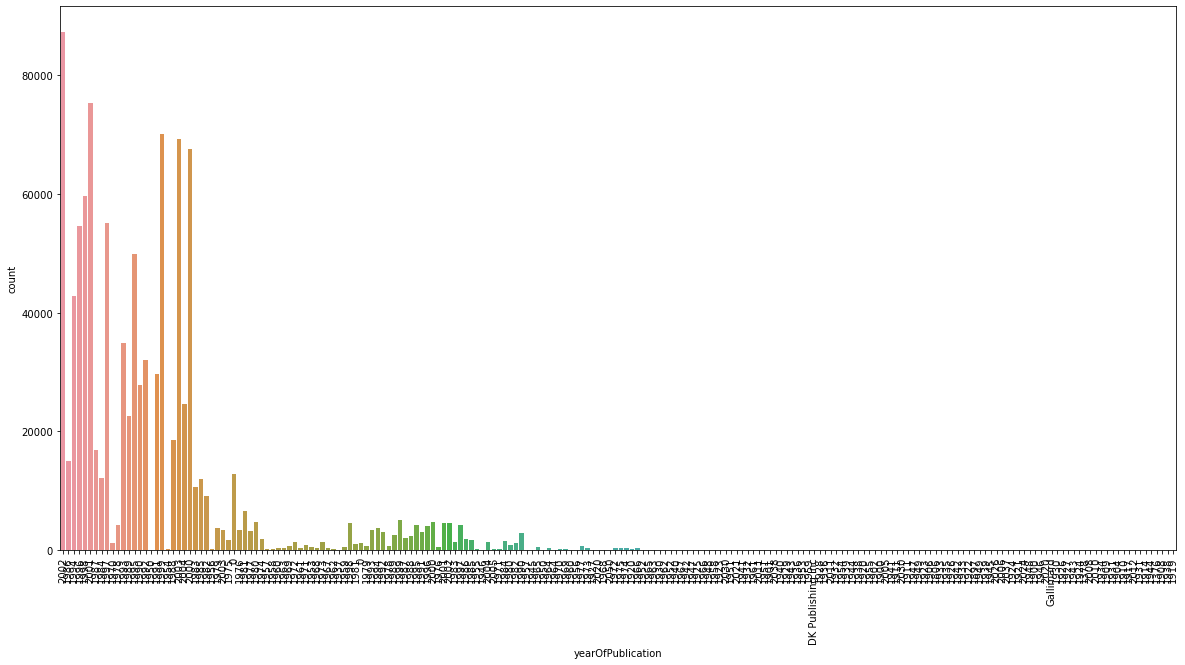

In [32]:
plt.figure(figsize=(20,10))
sns.countplot(x=dataset['yearOfPublication']);
plt.xticks(rotation=90)
plt.show()

#### Top 10 books read by readers

In [33]:
book_ratings_count = dataset['ISBN'].value_counts().head(10)
top_10_books_count=book_ratings_count.tolist()

top_10_isbns = book_ratings_count.index
top_10_book_titles=list(set(dataset[dataset["ISBN"].isin(top_10_isbns)]["bookTitle"].tolist()))
top_10_books=dict(zip(top_10_book_titles, top_10_books_count))
print("Top 10 books read by readers:")
print(top_10_books)

Top 10 books read by readers:
{'Snow Falling on Cedars': 2502, 'Wild Animus': 1295, 'Divine Secrets of the Ya-Ya Sisterhood: A Novel': 883, 'The Lovely Bones: A Novel': 732, "Where the Heart Is (Oprah's Book Club (Paperback))": 723, 'Angels &amp; Demons': 647, 'A Painted House': 615, 'The Secret Life of Bees': 614, 'The Da Vinci Code': 586, 'The Red Tent (Bestselling Backlist)': 585}


In [34]:
dataset.drop("ISBN", axis=1, inplace=True)
dataset.head()

,userID,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
0,276725,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa"
1,2313,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa"
2,2313,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa"
3,2313,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa"
4,2313,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa"


In [35]:
report=ProfileReport(dataset)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
dataset["Location"]=dataset["Location"].str.split(",").str[-1].str.strip()
display(dataset["Location"].head(10))
display(dataset["Location"].tail(10))

0    usa
1    usa
2    usa
3    usa
4    usa
5    usa
6    usa
7    usa
8    usa
9    usa
Name: Location, dtype: object

1031126               
1031127            usa
1031128            usa
1031129    switzerland
1031130    switzerland
1031131    switzerland
1031132       germany"
1031133            usa
1031134            usa
1031135      singapore
Name: Location, dtype: object

In [37]:
dataset["Location"]=dataset["Location"].str.rstrip('"')
display(dataset["Location"].tail(10))

1031126               
1031127            usa
1031128            usa
1031129    switzerland
1031130    switzerland
1031131    switzerland
1031132        germany
1031133            usa
1031134            usa
1031135      singapore
Name: Location, dtype: object

In [38]:
display(dataset[dataset["Location"]==""])
len_of_no_loc=len(dataset[dataset["Location"]==""])
print(f"Number of rows with no specific location {len_of_no_loc}.")

,userID,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
2719,39002,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,
11538,128276,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,
11539,128276,5,While I Was Gone,Sue Miller,1999,Ballantine Books,
11540,128276,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,
11541,128276,0,White Oleander : A Novel (Oprah's Book Club),Janet Fitch,2000,Back Bay Books,
...,...,...,...,...,...,...,...
1030636,256020,6,Le Correzioni,Jonathan Frazier,2002,Distribooks Inc,
1030681,257311,5,Heart of Alaska,Kathleen Sage,1997,Jove Books,
1030910,267240,8,Eva's Story: A Survivor's Tale by the Step-Sis...,Eva Schloss,1989,St Martins Pr,
1030912,267276,9,Address Unknown,Kathrine Kressmann Taylor,2001,Washington Square Press,


Number of rows with no specific location 24260.


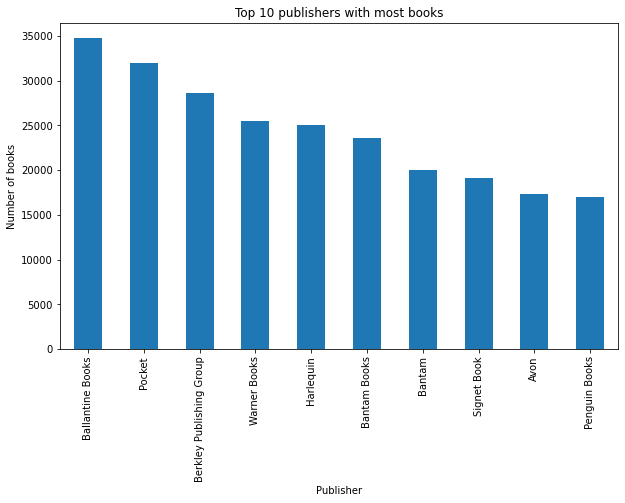

In [39]:
top_publishers=dataset["publisher"].value_counts().head(10)
plt.figure(figsize=(10,6))
top_publishers.plot(kind="bar")
plt.title("Top 10 publishers with most books")
plt.xlabel("Publisher")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.show()

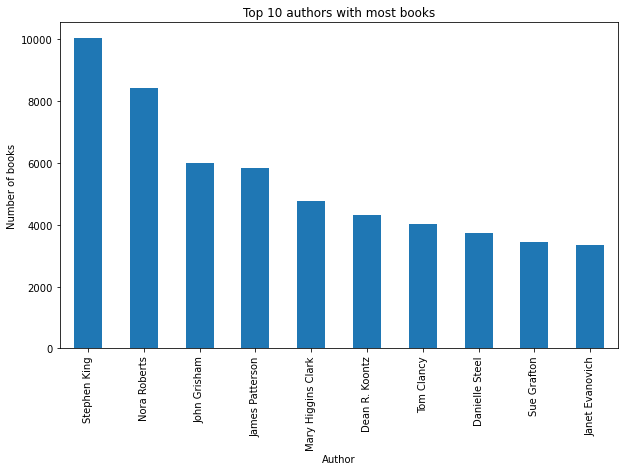

In [40]:
top_authors=dataset["bookAuthor"].value_counts().head(10)
plt.figure(figsize=(10,6))
top_authors.plot(kind="bar")
plt.title("Top 10 authors with most books")
plt.xlabel("Author")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.show()

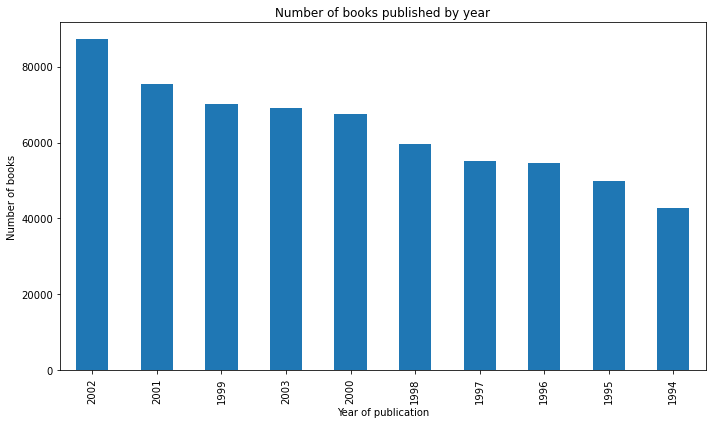

In [41]:
top_10_years=dataset["yearOfPublication"].value_counts().sort_values(ascending=False).head(10)
top_10_years.index=top_10_years.index.astype(int)
plt.figure(figsize=(10,6))
top_10_years.plot(kind="bar")
plt.title("Number of books published by year")
plt.xlabel("Year of publication")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

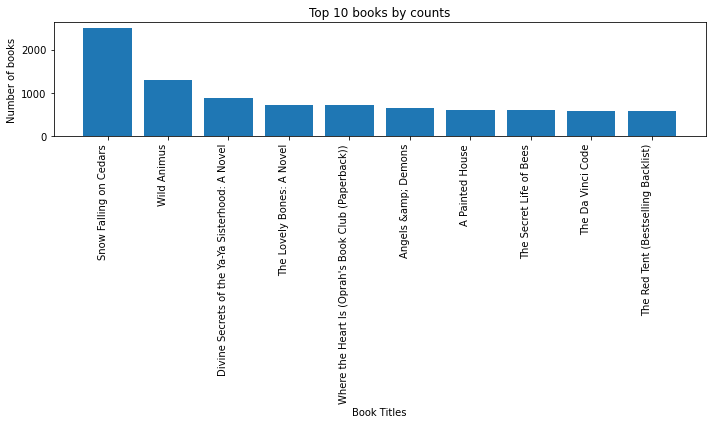

In [42]:
plt.figure(figsize=(10,6))
plt.bar(list(top_10_books.keys()),list(top_10_books.values()))
plt.xlabel("Book Titles")
plt.ylabel("Number of books")
plt.title("Top 10 books by counts")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

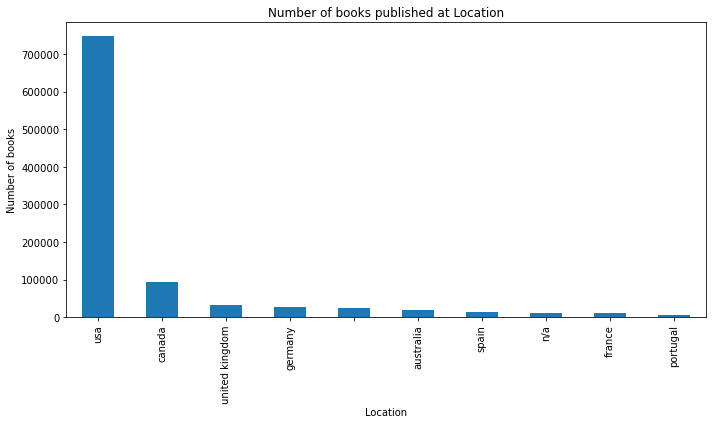

In [43]:
top_10_location=dataset["Location"].value_counts().sort_values(ascending=False).head(10)
top_10_location.index=top_10_location.index.astype(str)
plt.figure(figsize=(10,6))
top_10_location.plot(kind="bar")
plt.title("Number of books published at Location")
plt.xlabel("Location")
plt.ylabel("Number of books")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Popularity based recomender system

In [44]:
print("The number of ratings for each books:")
display(dataset.groupby("bookTitle").count()["bookRating"].reset_index())

The number of ratings for each books:


,bookTitle,bookRating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [45]:
num_rating_df=dataset.groupby("bookTitle").count()["bookRating"].reset_index()
num_rating_df.rename(columns={"bookRating": "numRating"}, inplace=True)

In [46]:
print("The average ratings of each and every book title:")
display(dataset.groupby('bookTitle')['bookRating'].agg(np.mean).reset_index())

The average ratings of each and every book title:


,bookTitle,bookRating
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [47]:
avg_rating_df=dataset.groupby('bookTitle')['bookRating'].agg(np.mean).reset_index()
avg_rating_df.rename(columns={"bookRating":"avgRating"}, inplace=True)

In [48]:
popularity_df=num_rating_df.merge(avg_rating_df, on="bookTitle")
print("Merging both the dataframes containing number of ratings for each book and average ratings:")
display(popularity_df)

Merging both the dataframes containing number of ratings for each book and average ratings:


,bookTitle,numRating,avgRating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [49]:
print("Top 50 books dataframe with number of ratings to be >= 250:")
top_50_books=popularity_df[popularity_df["numRating"]>=250].sort_values("avgRating", ascending=False).head(50)
display(top_50_books)

Top 50 books dataframe with number of ratings to be >= 250:


,bookTitle,numRating,avgRating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


In [50]:
final_top_50_books=top_50_books.merge(book, on="bookTitle").drop_duplicates('bookTitle')[["bookTitle",
            "bookAuthor","publisher","numRating","avgRating"]]
display(final_top_50_books)

,bookTitle,bookAuthor,publisher,numRating,avgRating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,Scholastic,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,Scholastic,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,Scholastic,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,Scholastic,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,Scholastic,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,Del Rey,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,Del Rey,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,Arthur A. Levine Books,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,Del Rey,260,4.880769
39,To Kill a Mockingbird,Harper Lee,Little Brown &amp; Company,510,4.700000


## Collaborative Filtering Based

#### Extract users and ratings of more than 200

In [51]:
x=dataset.groupby('userID').count()["bookRating"]>200
readers=x[x].index
print("Getting the IDs of the frequent readers:")
display(readers)

Getting the IDs of the frequent readers:


Int64Index([   254,   2276,   2766,   2977,   3363,   4017,   4385,   6251,
              6323,   6543,
            ...
            271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427,
            277639, 278418],
           dtype='int64', name='userID', length=811)

In [52]:
print("Filtering the rating the books given by the frequent readers:")
filtered_rating = dataset[dataset['userID'].isin(readers)]
display(filtered_rating)

Filtering the rating the books given by the frequent readers:


,userID,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
37,6543,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,usa
38,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",usa
39,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,usa
40,6543,0,Wild Animus,Rich Shapero,2004,Too Far,usa
41,6543,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,usa
...,...,...,...,...,...,...,...
892567,133868,0,"Bold Land, Bold Love",Connie Mason,1998,Love Spell,usa
892568,133868,0,Suddenly You,Lisa Kleypas,2001,"Avon Books, Harper Collins",usa
892569,133868,8,Heartless,Kat Martin,2001,St. Martin's Press,usa
892570,133868,0,Shifting Calder Wind,Janet Dailey,2004,Zebra Books,usa


#### Extract books that have received more than 50 ratings.

In [53]:
y = filtered_rating.groupby('bookTitle').count()['bookRating']>=50
famous_books = y[y].index
print("Considering the ratings of those books that have number of ratings>=50:")
display(famous_books)

Considering the ratings of those books that have number of ratings>=50:


Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='bookTitle', length=706)

In [54]:
final_ratings =  filtered_rating[filtered_rating['bookTitle'].isin(famous_books)]
final_ratings.drop_duplicates(['userID','bookTitle'], inplace=True)
print("Collecting the ratings of the famous books:")
display(final_ratings)

,userID,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,Location
38,6543,0,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",usa
39,6543,0,The Da Vinci Code,Dan Brown,2003,Doubleday,usa
40,6543,0,Wild Animus,Rich Shapero,2004,Too Far,usa
41,6543,0,Four To Score (A Stephanie Plum Novel),Janet Evanovich,1999,St. Martin's Paperbacks,usa
43,6543,10,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision,usa
...,...,...,...,...,...,...,...
842419,72352,0,Heartbreaker,Linda Howard,2002,Mira,spain
842458,72352,10,Guardian Angel,Julie Garwood,1990,Pocket,spain
856993,4385,0,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,usa
857035,4385,10,The Runaway Jury,JOHN GRISHAM,1997,Dell,usa


#### Create Pivot Table

In [55]:
print("Creating a pivot table with user ID as columns, book titles as rows and book rating  as values:")
pt=final_ratings.pivot_table(index="bookTitle", columns="userID", values="bookRating")
display(pt)

Creating a pivot table with user ID as columns, book titles as rows and book rating  as values:


userID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [56]:
pt.fillna(0,inplace=True)
print("Filling up the NaN values with 0:")
display(pt)

Filling up the NaN values with 0:


userID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Modeling - Cosine Similarity

In [57]:
print("Similarity Score Table:")
similarity_score=cosine_similarity(pt)
display(similarity_score)

Similarity Score Table:


array([[1.        , 0.0841001 , 0.        , ..., 0.1018633 , 0.04861807,
        0.0356652 ],
       [0.0841001 , 1.        , 0.27877594, ..., 0.0754821 , 0.16637508,
        0.15301029],
       [0.        , 0.27877594, 1.        , ..., 0.04732923, 0.05195619,
        0.11178963],
       ...,
       [0.1018633 , 0.0754821 , 0.04732923, ..., 1.        , 0.07085128,
        0.03898126],
       [0.04861807, 0.16637508, 0.05195619, ..., 0.07085128, 1.        ,
        0.13208788],
       [0.0356652 , 0.15301029, 0.11178963, ..., 0.03898126, 0.13208788,
        1.        ]])

In [58]:
print("Shape of Similarity Score Table:")
print(similarity_score.shape)

Shape of Similarity Score Table:
(706, 706)


In [59]:
print("Making the final function to recommend the right book from the user's input.")
def recommend(book_name):
    index=np.where(pt.index==book_name)[0][0]
    similarity_books=sorted(list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:11]
    data=[]
    for i in similarity_books:
        item=[]
        temp_df=book[book['bookTitle']==pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('bookTitle')['bookTitle'].values))
        item.extend(list(temp_df.drop_duplicates('bookTitle')['bookAuthor'].values))
        data.append(item)
    return(data)

Making the final function to recommend the right book from the user's input.


In [60]:
book_input="The Notebook"
recommended_books_list=recommend(book_input)
recommended_books_df=pd.DataFrame(recommended_books_list, columns=["Book Title", "Author"], index=range(1,11))
print(f"The top 10 recommended books related to {book_input} are:")
display(recommended_books_df)

The top 10 recommended books related to The Notebook are:


,Book Title,Author
1,A Walk to Remember,Nicholas Sparks
2,The Rescue,Nicholas Sparks
3,Nights in Rodanthe,Nicholas Sparks
4,The Five People You Meet in Heaven,Mitch Albom
5,The Guardian,Nicholas Sparks
6,Toxin,Robin Cook
7,One Door Away from Heaven,Dean R. Koontz
8,Suzanne's Diary for Nicholas,James Patterson
9,Everything's Eventual : 14 Dark Tales,Stephen King
10,The Red Tent (Bestselling Backlist),Anita Diamant


In [61]:
book_input="Harry Potter and the Prisoner of Azkaban (Book 3)"
recommended_books_list=recommend(book_input)
recommended_books_df=pd.DataFrame(recommended_books_list, columns=["Book Title", "Author"], index=range(1,11))
print(f"The top 10 recommended books related to {book_input} are:")
display(recommended_books_df)

The top 10 recommended books related to Harry Potter and the Prisoner of Azkaban (Book 3) are:


,Book Title,Author
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling
2,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling
3,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling
4,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling
5,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling
6,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN
7,Charlotte's Web (Trophy Newbery),E. B. White
8,Interview with the Vampire,Anne Rice
9,Anne of Avonlea (Anne of Green Gables Novels (...,L.M. MONTGOMERY
10,A Wrinkle in Time,Madeleine L'Engle


In [62]:
book_input="1984"
recommended_books_list=recommend(book_input)
recommended_books_df=pd.DataFrame(recommended_books_list, columns=["Book Title", "Author"], index=range(1,11))
print(f"The top 10 recommended books related to {book_input} are:")
display(recommended_books_df)

The top 10 recommended books related to 1984 are:


,Book Title,Author
1,The Handmaid's Tale,Margaret Atwood
2,Brave New World,Aldous Huxley
3,Animal Farm,George Orwell
4,"The Vampire Lestat (Vampire Chronicles, Book II)",ANNE RICE
5,Naked,David Sedaris
6,The Hours : A Novel,Michael Cunningham
7,Fahrenheit 451,Ray Bradbury
8,The Catcher in the Rye,J.D. Salinger
9,Bastard Out of Carolina,Dorothy Allison
10,"The Drawing of the Three (The Dark Tower, Book 2)",Stephen King
